In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# Analizo  auctions 

In [ ]:
auctions = pd.read_csv("data/auctions.csv", dtype = {"auction_type_id": np.float16,"platform": np.int8, "ref_type_id": np.int8, "source_id": np.int8})



In [ ]:
#Ver notebook de analisis de datos
auctions['date']=pd.to_datetime(auctions['date'])
del auctions['country']
auctions['device_id']=auctions['device_id'].astype('category')
del auctions['auction_type_id']

In [ ]:
auctions.memory_usage(deep=True)

In [ ]:
auctions.memory_usage(deep=True).sum()

In [ ]:
auctions.head()

In [ ]:
sns.countplot(y='platform', data=auctions)

In [ ]:
sns.countplot(y='source_id', data=auctions)

In [ ]:
sns.countplot(y='ref_type_id', data=auctions)

In [ ]:
grupo_device_id=auctions.groupby(['device_id'])['device_id'].count().sort_values(ascending=False).rename("Cantidad").reset_index()
grupo_device_id.head()

In [ ]:
auctions['año'] = pd.DatetimeIndex(auctions['date']).year
auctions['mes'] = auctions['date'].dt.month
auctions['día'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
auctions['minuto'] = auctions['date'].dt.minute
auctions.head()

In [ ]:
# ¿Sobre qué años abarca el datafrae?
auctions['año'].describe()

In [ ]:
# ¿Sobre qué meses abarca el datafrae?
#solo hay datos de marzo
auctions['mes'].describe()

In [ ]:
auctions['día'].describe()

In [6]:
auctions['diaSemana'] = auctions['date'].dt.weekday_name
auctions.head()

,date,device_id,platform,ref_type_id,source_id,año,mes,día,hora,minuto,diaSemana
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,2019,3,11,14,18,Monday
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,2019,3,11,14,18,Monday
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,2019,3,11,14,18,Monday
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,2019,3,11,14,18,Monday
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,2019,3,11,14,18,Monday


In [13]:
grupo_auctions_por_dia=auctions.groupby(['diaSemana'])['diaSemana'].count().sort_values(ascending=False).rename("Totalauctions").reset_index()
grupo_auctions_por_dia.head()                                

,diaSemana,Totalauctions
0,Wednesday,3971343
1,Tuesday,3962311
2,Sunday,2637534
3,Monday,2574916
4,Friday,2303002


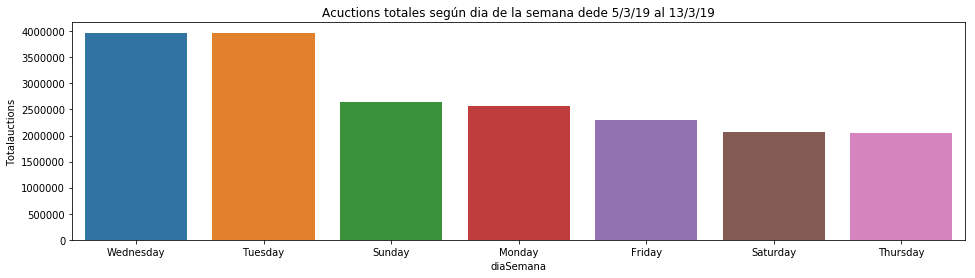

In [14]:
ax = sns.barplot(x='diaSemana', y='Totalauctions', data=grupo_auctions_por_dia)
ax.set_title('Acuctions totales según dia de la semana dede 5/3/19 al 13/3/19')
ax.figure.set_size_inches(16, 4)

In [8]:
grupo_auctions_por_hora=auctions.groupby(['diaSemana','hora','minuto'])['minuto'].count().sort_values(ascending=False).rename("Totalauctions").reset_index()
grupo_auctions_por_hora.head(20) 

,diaSemana,hora,minuto,Totalauctions
0,Wednesday,1,21,6382
1,Tuesday,1,20,6338
2,Tuesday,1,19,6315
3,Tuesday,1,12,6291
4,Tuesday,1,40,6260
5,Tuesday,1,37,6245
6,Tuesday,1,39,6244
7,Tuesday,1,41,6231
8,Wednesday,2,1,6224
9,Tuesday,1,36,6215


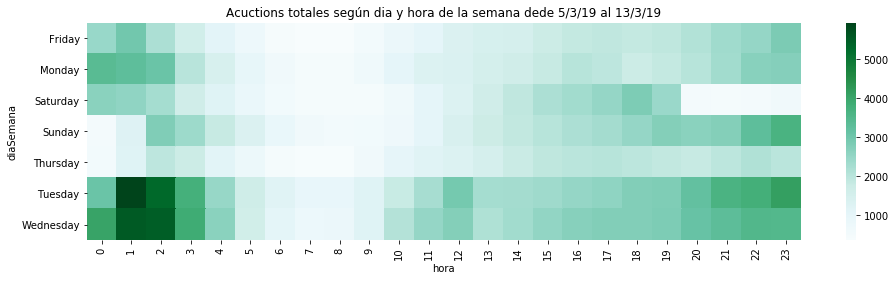

In [18]:
df2 = grupo_auctions_por_hora[['diaSemana','minuto', 'hora','Totalauctions']]
heatmap2_data = pd.pivot_table(df2,values='Totalauctions', index=['diaSemana'], columns={'hora'})
heatmap2_data.head(n=5)
ax=sns.heatmap(heatmap2_data, cmap="BuGn")
ax.set_title('Acuctions totales según dia y hora de la semana dede 5/3/19 al 13/3/19')
ax.figure.set_size_inches(16, 4)